In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [16]:
!pip install statsmodels



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
!pip install lightgbm



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import (
    confusion_matrix, accuracy_score, mean_squared_error, r2_score, 
    roc_auc_score, roc_curve, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import lightgbm as lgbm  # LightGBM classifier

# Print confirmation
print("All libraries imported successfully!")


All libraries imported successfully!


In [3]:
diabetes=pd.read_csv('diabetes.csv')#dataset imported


In [4]:
diabetes.head()#fetched top 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
print(diabetes)#complete dataset


     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [6]:
diabetes.info()#provides an overview of your Pandas DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.shape

(768, 9)

In [8]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Max Age:81,Min Age:21


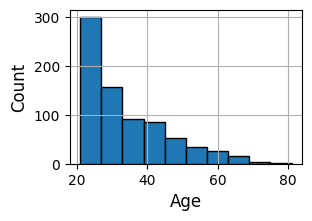

In [9]:
#finding max and min age 
plt.figure(figsize=(3,2))
plt.xlabel('Age',fontsize=12)
plt.ylabel("Count",fontsize=12)
diabetes["Age"].hist(edgecolor="black");
print("Max Age:"+str(diabetes["Age"].max())+','+"Min Age:"+str(diabetes["Age"].min()))

<Axes: xlabel='BMI', ylabel='Density'>

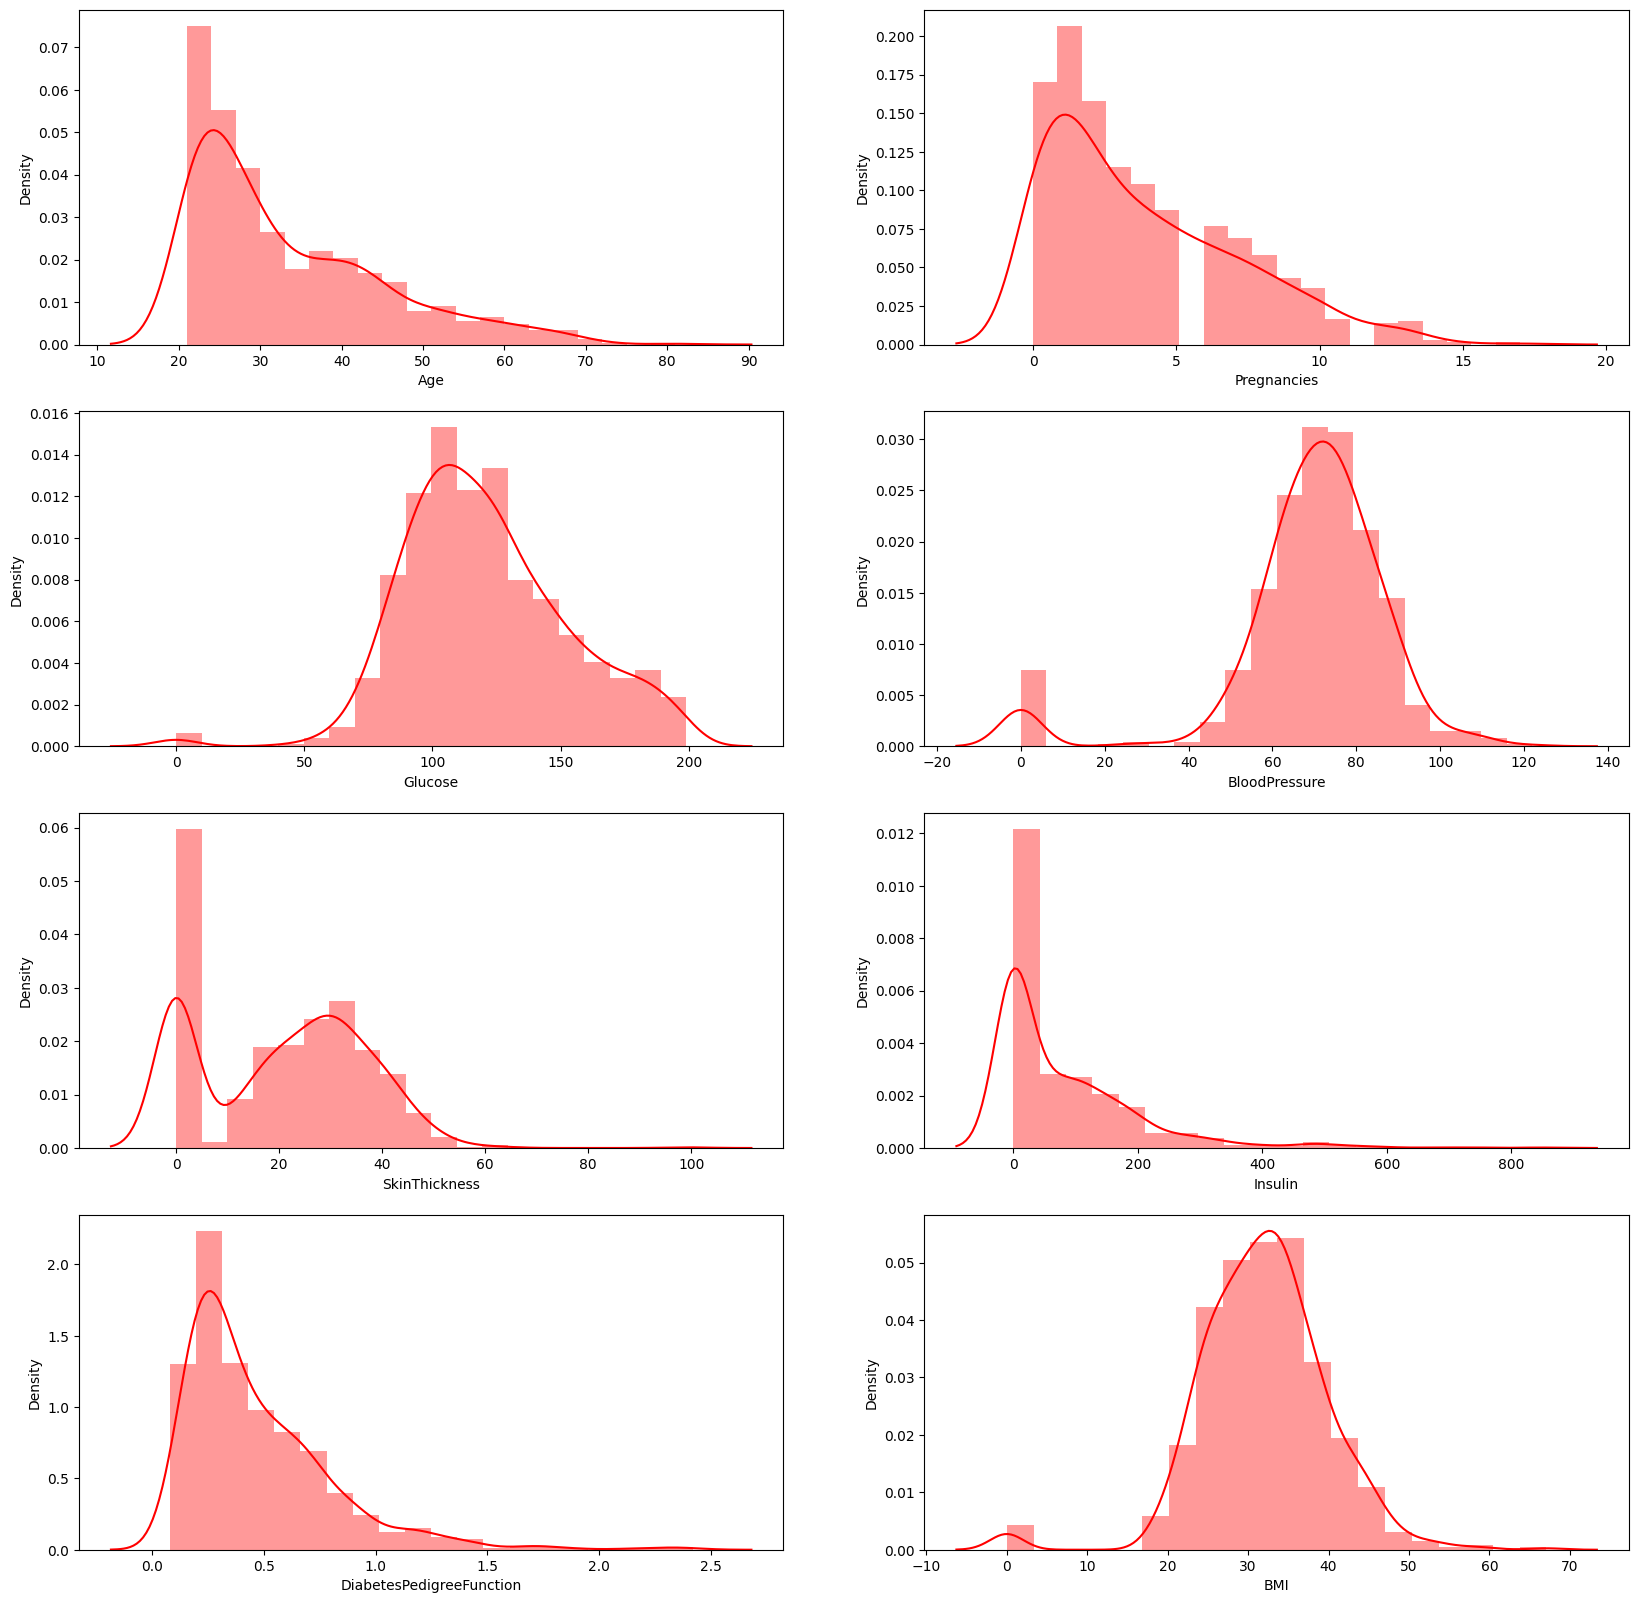

In [10]:
#plot histogram and density graphs of all variables
fig,ax=plt.subplots(4,2,figsize=(20,20))
sns.distplot(diabetes.Age,bins=20,ax=ax[0,0],color="red")
sns.distplot(diabetes.Pregnancies,bins=20,ax=ax[0,1],color="red")
sns.distplot(diabetes.Glucose,bins=20,ax=ax[1,0],color="red")
sns.distplot(diabetes.BloodPressure,bins=20,ax=ax[1,1],color="red")
sns.distplot(diabetes.SkinThickness,bins=20,ax=ax[2,0],color="red")
sns.distplot(diabetes.Insulin,bins=20,ax=ax[2,1],color="red")
sns.distplot(diabetes.DiabetesPedigreeFunction,bins=20,ax=ax[3,0],color="red")
sns.distplot(diabetes.BMI,bins=20,ax=ax[3,1],color="red")


In [11]:
diabetes.groupby("Outcome").agg({"Pregnancies":"mean"})

,Pregnancies
Outcome,
0,3.298000
1,4.865672


In [12]:
diabetes.groupby("Outcome").agg({"Age":"mean"})

,Age
Outcome,
0,31.190000
1,37.067164


In [13]:
diabetes.groupby("Outcome").agg({"Age":"min"})

,Age
Outcome,
0,21
1,21


In [14]:
diabetes.groupby("Outcome").agg({"Age":"max"})

,Age
Outcome,
0,81
1,70


In [15]:
diabetes.groupby("Outcome").agg({"Insulin":"mean"})

,Insulin
Outcome,
0,68.792000
1,100.335821


In [16]:
diabetes.groupby("Outcome").agg({"Insulin":"max"})

,Insulin
Outcome,
0,744
1,846


In [17]:
diabetes.groupby("Outcome").agg({"Insulin":"min"})


,Insulin
Outcome,
0,0
1,0


In [18]:
diabetes.groupby("Outcome").agg({"Glucose":"mean"})


,Glucose
Outcome,
0,109.980000
1,141.257463


In [19]:
diabetes.groupby("Outcome").agg({"Glucose":"min"})


,Glucose
Outcome,
0,0
1,0


In [20]:
diabetes.groupby("Outcome").agg({"Glucose":"max"})


,Glucose
Outcome,
0,197
1,199


In [21]:
diabetes.groupby("Outcome").agg({"BMI":"mean"})


,BMI
Outcome,
0,30.304200
1,35.142537


In [22]:
diabetes.groupby("Outcome").agg({"BMI":"min"})


,BMI
Outcome,
0,0.0
1,0.0


In [23]:
diabetes.groupby("Outcome").agg({"BMI":"max"})


,BMI
Outcome,
0,57.3
1,67.1


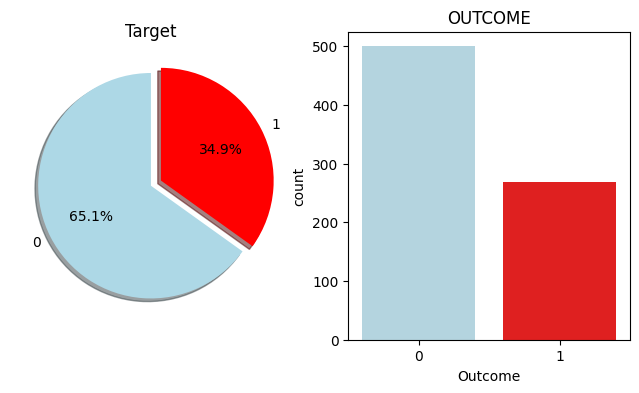

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating subplots
f, ax = plt.subplots(1, 2, figsize=(8, 4))

# ✅ Correct way to plot pie chart with explode
diabetes['Outcome'].value_counts().plot.pie(
    explode=[0, 0.1],  # Exploding only the "Diabetic" category
    autopct='%1.1f%%',  # Display percentage
    ax=ax[0], 
    shadow=True,
    startangle=90, 
    colors=['lightblue', 'red']
)

ax[0].set_title('Target')
ax[0].set_ylabel('')  # Remove y-label for aesthetics

# ✅ Correct way to use countplot in Seaborn
sns.countplot(x='Outcome', data=diabetes, ax=ax[1], palette=['lightblue', 'red'])
ax[1].set_title('OUTCOME')

# Show the plots
plt.show()


In [25]:
diabetes.corr()#corr()is used to find pairwise corelation of all columns in the dataframe.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


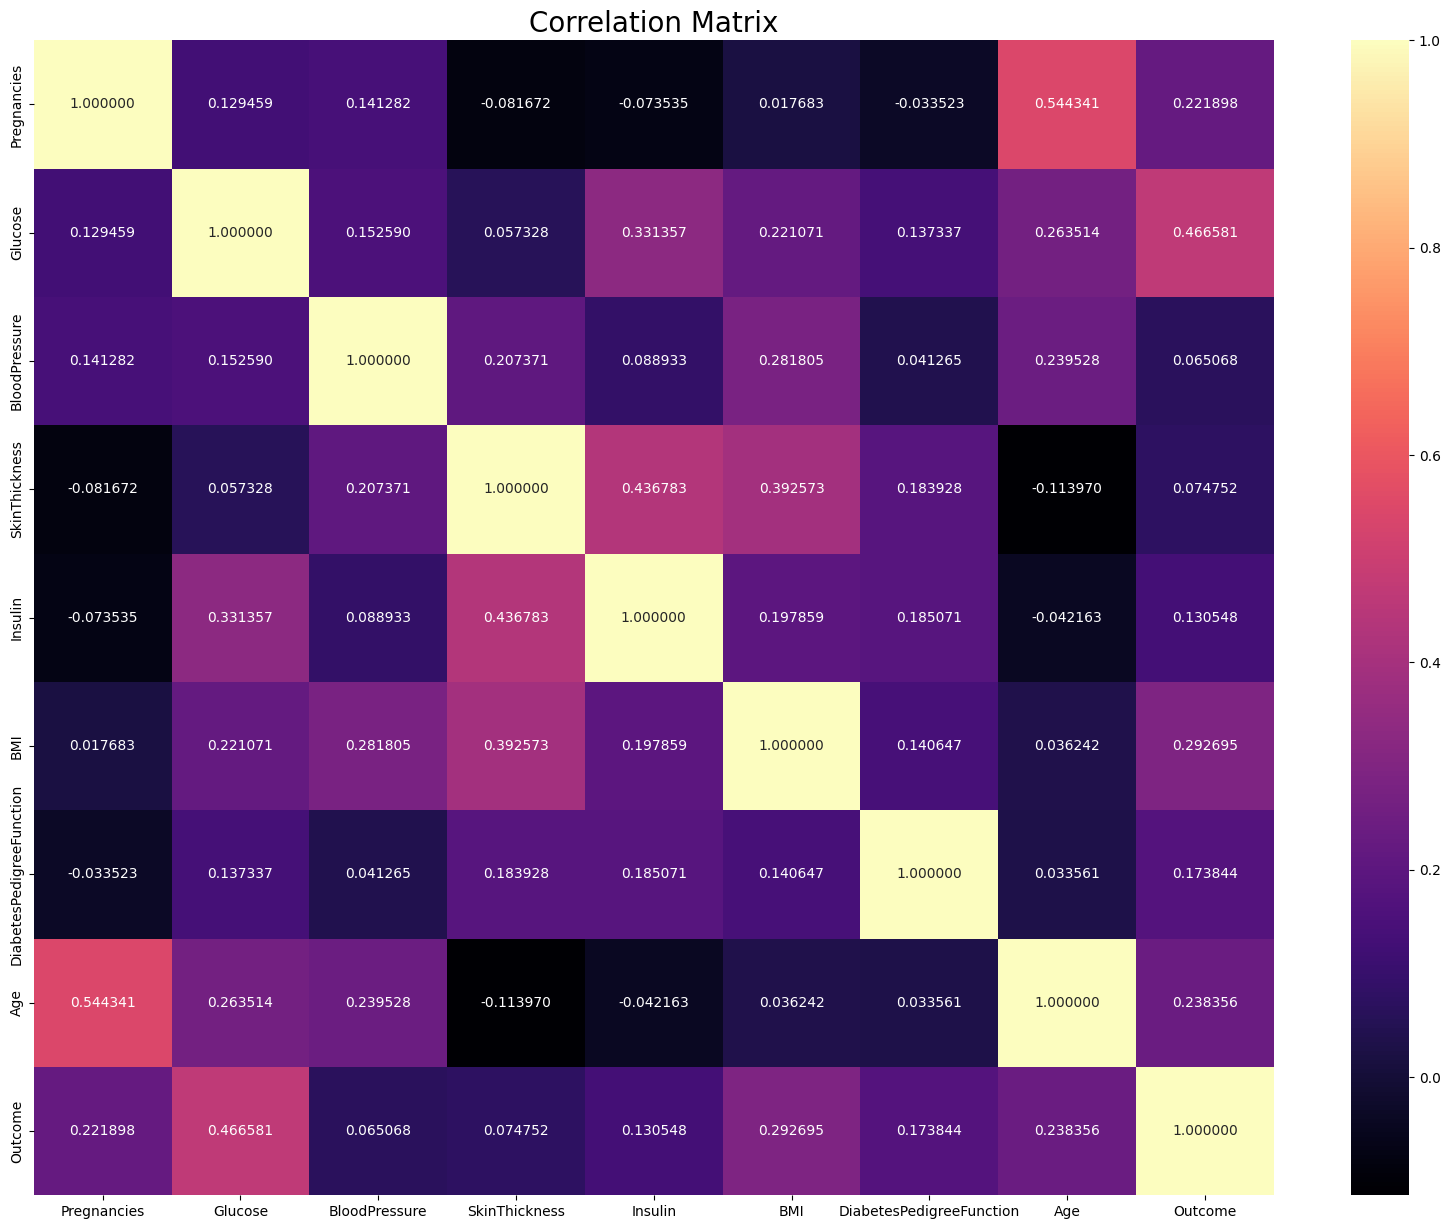

In [26]:
#correaltion matrix 
f,ax=plt.subplots(figsize=[20,15])
sns.heatmap(diabetes.corr(),annot=True,fmt="2f",ax=ax,cmap='magma')
ax.set_title("Correlation Matrix",fontsize=20)
plt.show()

DATA PREPROCESSING

MISSING OBSERVATION ANALYSIS

In [27]:
#we can see that in the dataset there are some feature which contain 0,and awe also know that in the medical term it is not possible to have
#0, so we will replace them with NaN

In [28]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [33]:
diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=diabetes[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [34]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [35]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [75]:
!pip install missingno


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


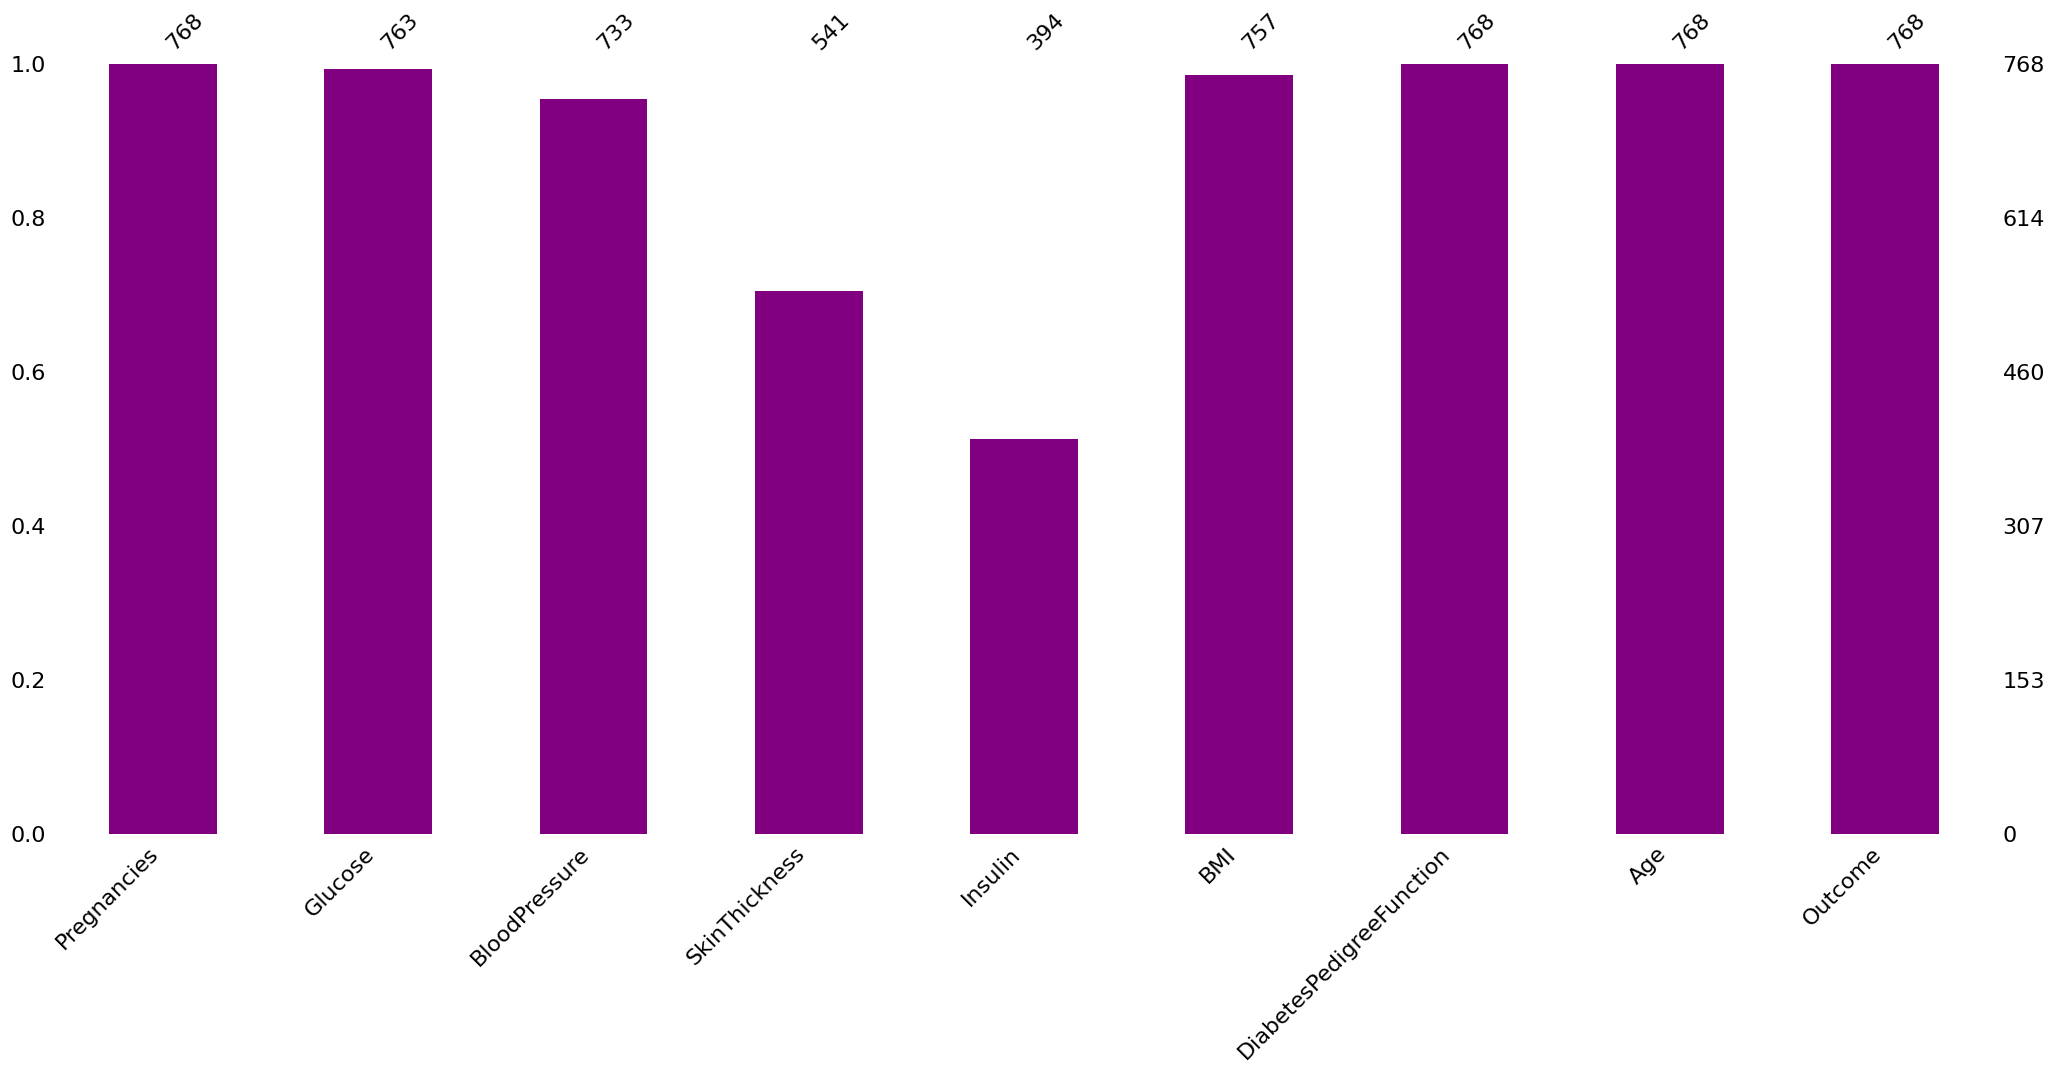

In [38]:
#visualizing the missing observation using the missingno library
import missingno as msno
msno.bar(diabetes,color="purple");

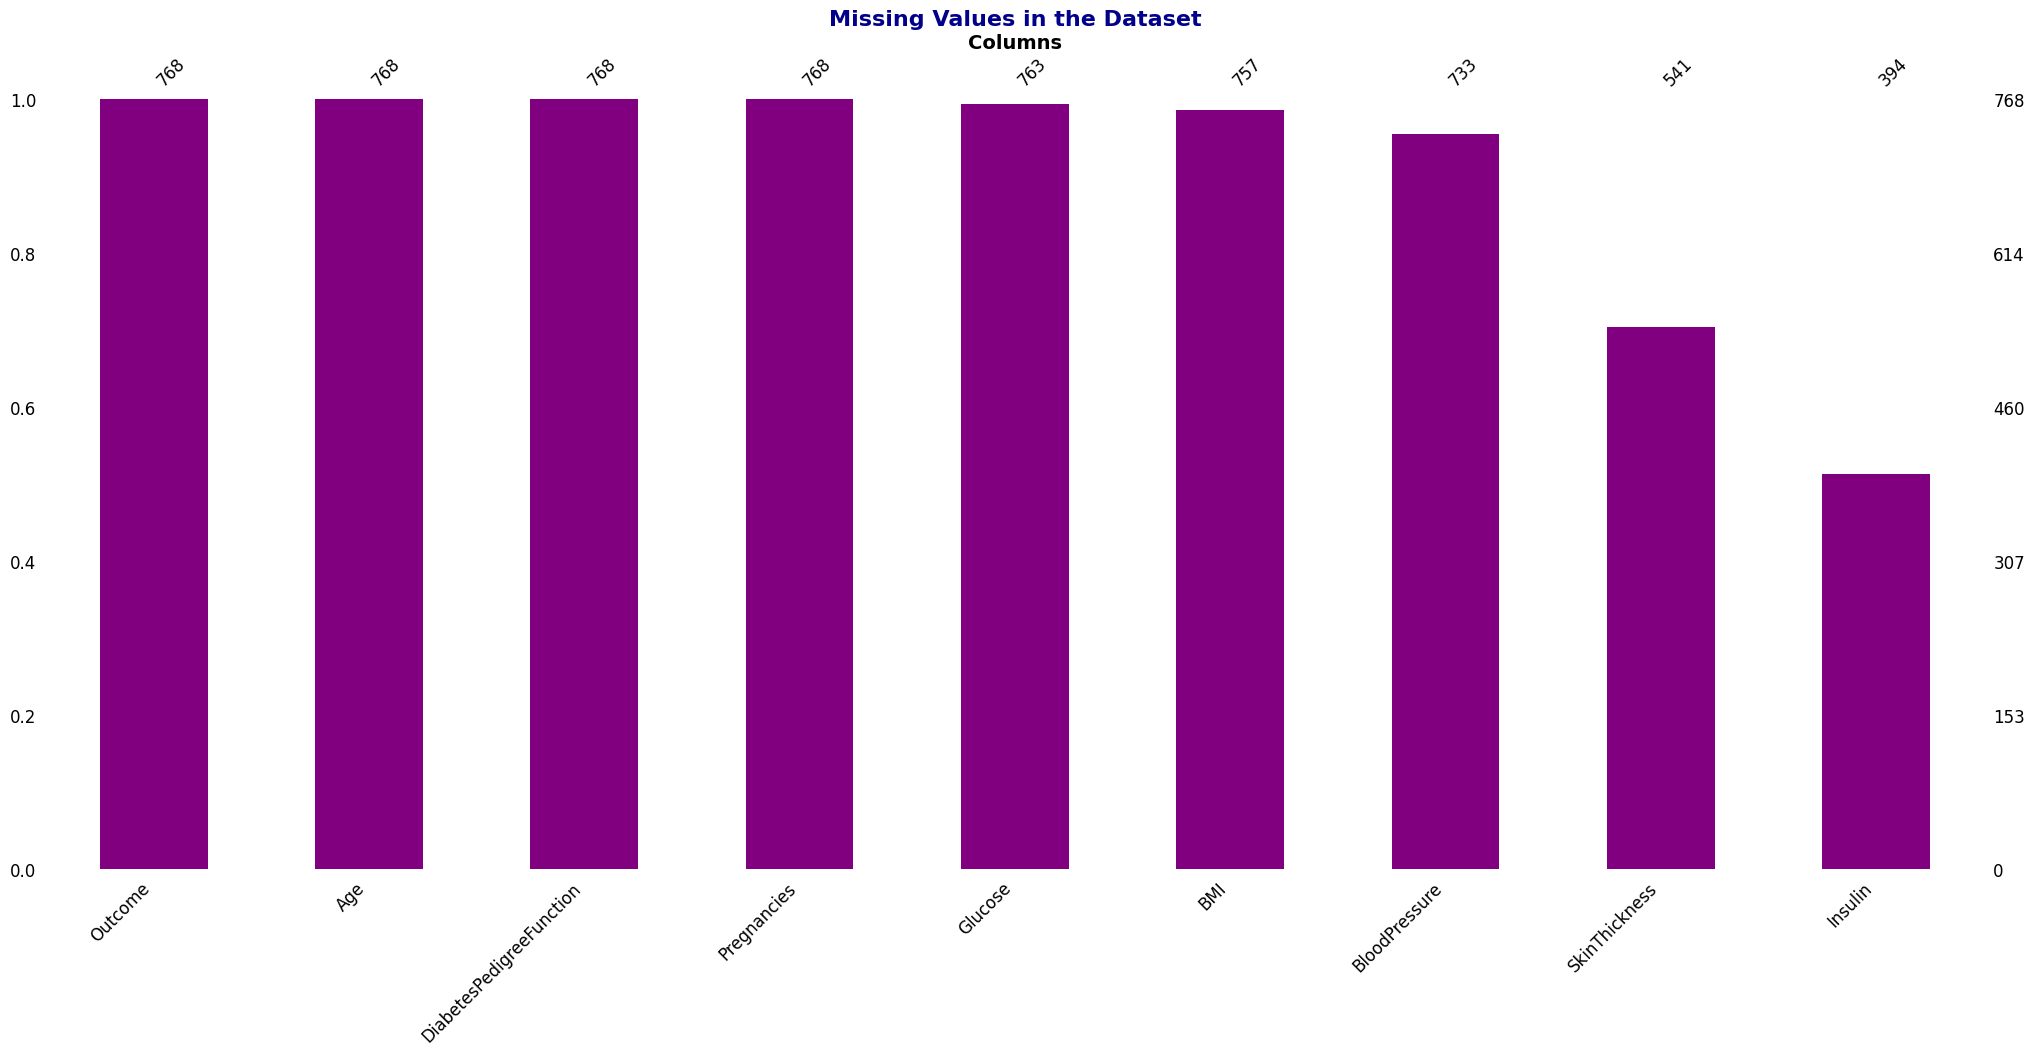

In [41]:
import missingno as msno
import matplotlib.pyplot as plt
plt.figure(figsize=(2,1))
msno.bar(diabetes, color="purple", fontsize=12, sort="descending")
plt.title("Missing Values in the Dataset", fontsize=16, fontweight="bold", color="darkblue")
plt.xlabel("Columns", fontsize=14, fontweight="bold")
plt.ylabel("Number of Non-Missing Values", fontsize=14, fontweight="bold")
plt.show()


In [44]:
import missingno as msno
import matplotlib.pyplot as plt
subset_diabetes = diabetes.iloc[:, :20]
# Set figure size (adjust width dynamically based on column count)
plt.figure(figsize=(min(len(subset_diabetes.columns) * 1.5, 20), 6))  # Limits max width to 20
msno.bar(subset_diabetes, color="purple", fontsize=12, sort="descending")
missing_counts = subset_diabetes.isnull().sum()
# Add text annotations to show missing values
for i, col in enumerate(subset_diabetes.columns):
    plt.text(i, subset_diabetes.shape[0] - missing_counts[col] - 10,  # Adjust position
             f"{missing_counts[col]}", fontsize=12, color="black", ha="center", rotation=45)
plt.xticks(rotation=45, ha="right", fontsize=12)# Rotate x-axis labels for better visibility
plt.title("Missing Values in Each Column", fontsize=16, fontweight="bold", color="darkblue")
plt.xlabel("Columns", fontsize=14, fontweight="bold")
plt.ylabel("Number of Non-Missing Values", fontsize=14, fontweight="bold")
plt.show()


ValueError: Image size of 2035x583871 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2500x1000 with 3 Axes>

In [ ]:
#tried to set the missingvalues in the columns of barchart but unable because of the error
#"Image size of 2035x583871 pixels is too large. It must be less than 2^16 in each direction."
#so i tried to find that using heatmap

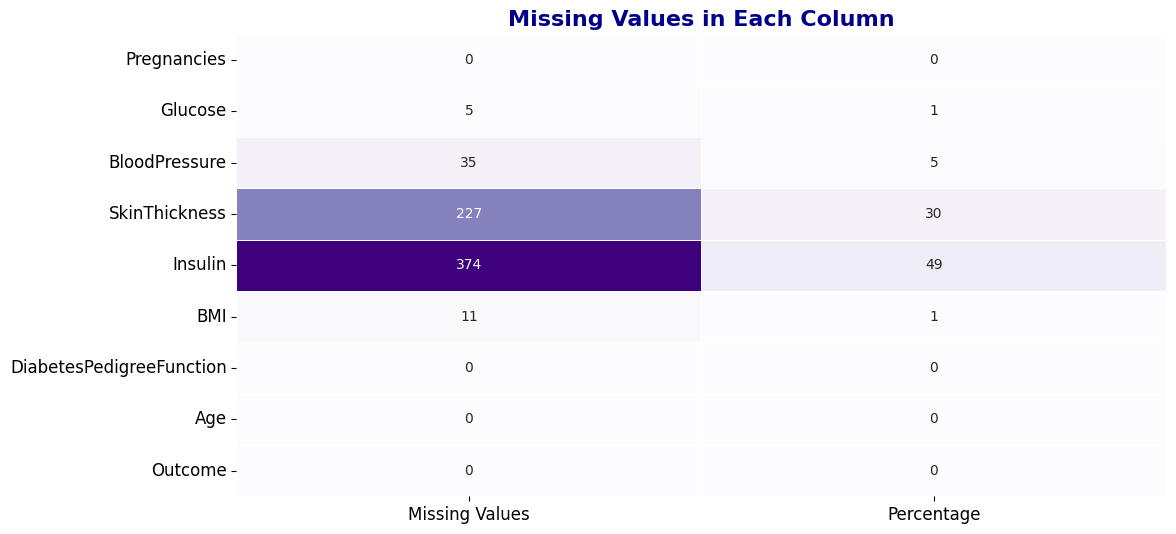

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
missing_counts = diabetes.isnull().sum()
missing_percentage = (missing_counts / len(diabetes)) * 100 # Calculate missing value counts and percentages
missing_data = pd.DataFrame({'Missing Values': missing_counts, 'Percentage': missing_percentage})
plt.figure(figsize=(12, 6))
sns.heatmap(missing_data, annot=True, fmt=".0f", cmap="Purples", linewidths=0.5, cbar=False)
plt.xticks(rotation=0, ha="center", fontsize=12)  # Keep labels horizontal
plt.yticks(rotation=0, fontsize=12)  # Keep row labels horizontal

plt.title("Missing Values in Each Column", fontsize=16, fontweight="bold", color="darkblue")
plt.show()


In [52]:
#The missing values will be filled with the median values of each variable
def median_target(var):
    temp=diabetes[diabetes[var].notnull()]
    temp=temp[[var,'Outcome']].groupby(['Outcome'])[[var]].median().reset_index()
    return temp

In [55]:
# Step 1: Get all column names except 'Outcome'
columns = diabetes.columns  # Get all columns
columns = columns.drop("Outcome")  # Drop 'Outcome' since we don’t impute it

# Step 2: Iterate over each column (except Outcome)
for i in columns:
    median_target(i)  # Compute median for each group (Outcome 0 & 1)
    
    # Step 3: Fill missing values for non-diabetic people (Outcome = 0)
    diabetes.loc[(diabetes['Outcome'] == 0) & (diabetes[i].isnull()), i] = median_target(i)[i][0]
    
    # Step 4: Fill missing values for diabetic people (Outcome = 1)
    diabetes.loc[(diabetes['Outcome'] == 1) & (diabetes[i].isnull()), i] = median_target(i)[i][1]


In [56]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,0
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [57]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Pair plot for clean Data
The pairs plot builds on two basic figures the histogram and the scatter plot.The histogram  on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables

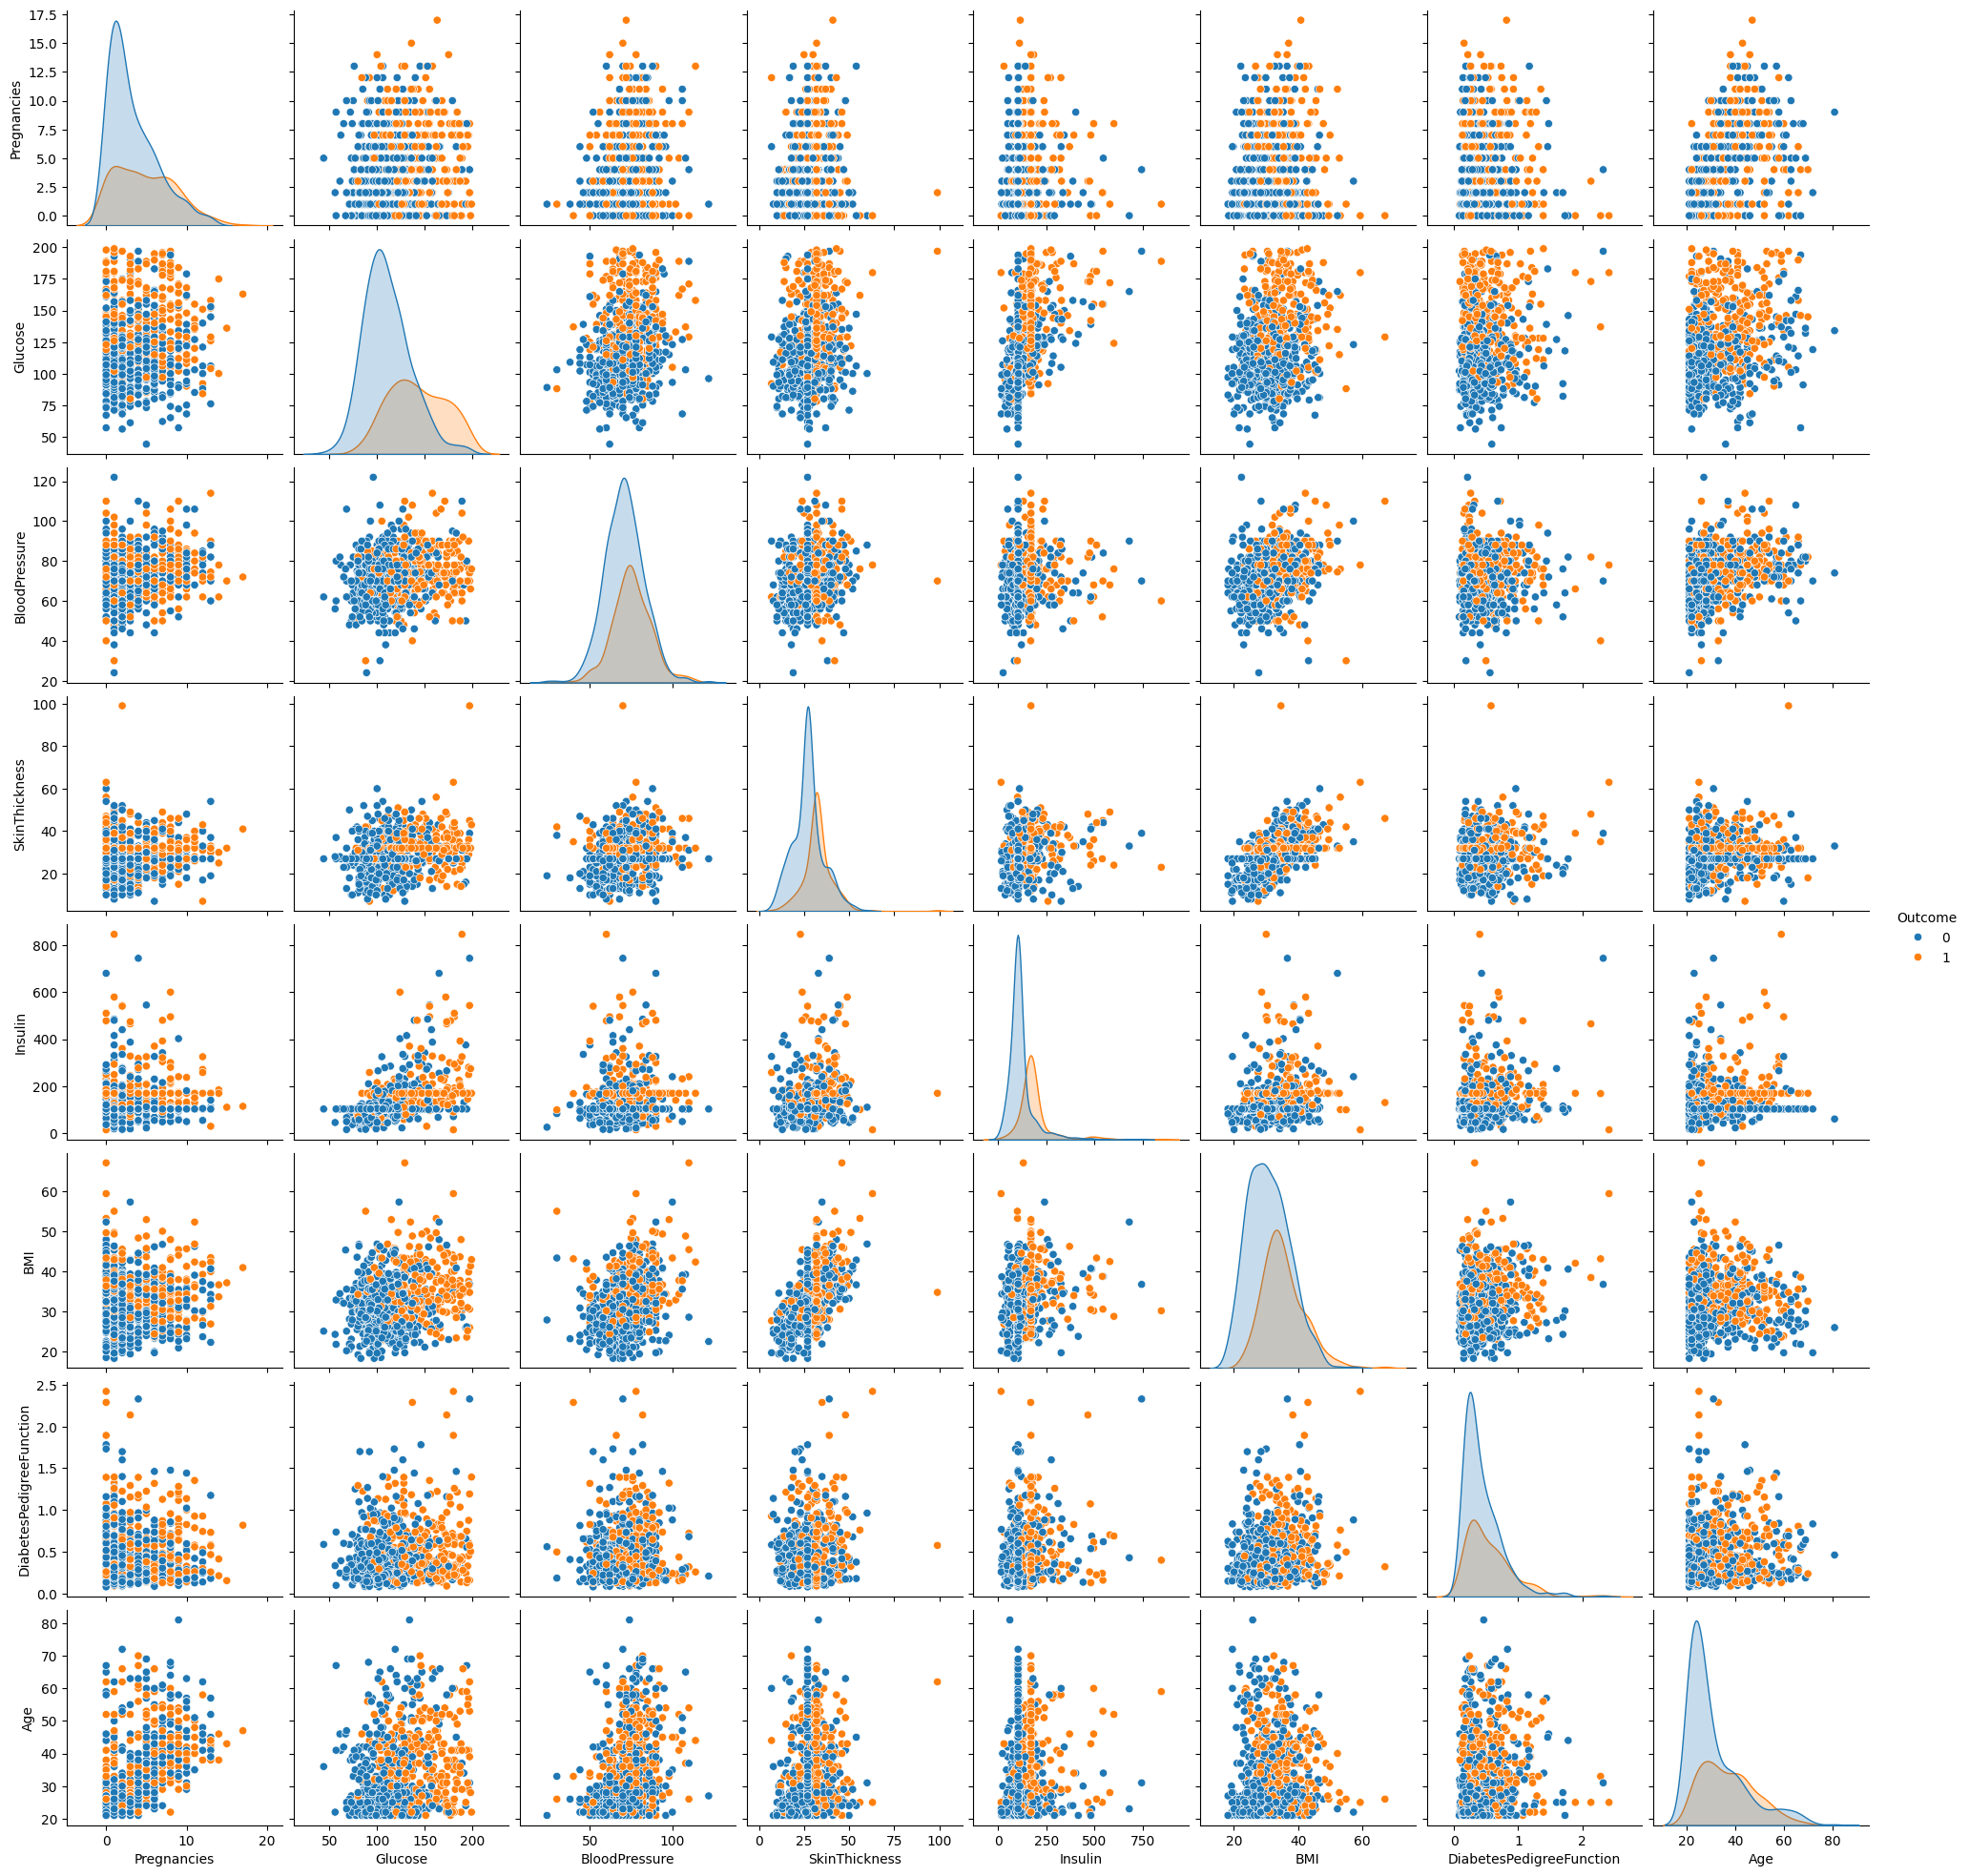

In [59]:
p=sns.pairplot(diabetes,hue='Outcome')

In [63]:
import pandas as pd
from tabulate import tabulate  # Install using: pip install tabulate

# Drop the Outcome column
diabetes_features = diabetes.drop(columns=['Outcome'])

# Compute correlation matrix
correlation_matrix = diabetes_features.corr()

# Convert to a DataFrame with absolute values for easier sorting
correlation_unstacked = correlation_matrix.abs().unstack().reset_index()
correlation_unstacked.columns = ['Feature_1', 'Feature_2', 'Correlation']

# Remove self-correlations (1.0) and duplicate pairs
correlation_unstacked = correlation_unstacked[correlation_unstacked['Feature_1'] != correlation_unstacked['Feature_2']]
correlation_unstacked = correlation_unstacked.drop_duplicates(subset=['Correlation'])

# Categorize correlations
high_corr = correlation_unstacked[correlation_unstacked['Correlation'] >= 0.5]
moderate_corr = correlation_unstacked[(correlation_unstacked['Correlation'] >= 0.3) & (correlation_unstacked['Correlation'] < 0.5)]
low_corr = correlation_unstacked[correlation_unstacked['Correlation'] < 0.3]

# Print the categorized correlations in table format
print("\n🔴 High Correlation Features (≥ 0.5):")
print(tabulate(high_corr, headers='keys', tablefmt='grid'))

print("\n🟠 Moderate Correlation Features (0.3 - 0.5):")
print(tabulate(moderate_corr, headers='keys', tablefmt='grid'))

print("\n🟢 Low Correlation Features (< 0.3):")
print(tabulate(low_corr, headers='keys', tablefmt='grid'))



🔴 High Correlation Features (≥ 0.5):
+----+---------------+-------------+---------------+
|    | Feature_1     | Feature_2   |   Correlation |
+====+===============+=============+===============+
|  7 | Pregnancies   | Age         |      0.544341 |
+----+---------------+-------------+---------------+
| 29 | SkinThickness | BMI         |      0.566086 |
+----+---------------+-------------+---------------+

🟠 Moderate Correlation Features (0.3 - 0.5):
+----+---------------+-------------+---------------+
|    | Feature_1     | Feature_2   |   Correlation |
+====+===============+=============+===============+
| 12 | Glucose       | Insulin     |      0.490015 |
+----+---------------+-------------+---------------+
| 23 | BloodPressure | Age         |      0.325135 |
+----+---------------+-------------+---------------+

🟢 Low Correlation Features (< 0.3):
+----+--------------------------+--------------------------+---------------+
|    | Feature_1                | Feature_2                |

Outlier Observation Analysis

In [64]:
for feature in diabetes:
    Q1=diabetes[feature].quantile(0S.25)
    Q3=diabetes[feature].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR#Any value below the lower threshold is considered a low outlier.
    upper=Q3-1.5*IQR#Any value below the higher threshold is considered a higher outlier.
    if diabetes[(diabetes[feature]>upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature,"no")

Pregnancies yes
Glucose yes
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome yes


In [ ]:
#please check the other notebook of diabetes.

In [76]:
# Exclude the target variable 'Outcome'
features = diabetes.columns.drop("Outcome")  

# Dictionary to store the number of outliers for each feature
outlier_counts = {}

for feature in features:
    Q1 = diabetes[feature].quantile(0.25)  # First quartile (25th percentile)
    Q3 = diabetes[feature].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower = Q1 - 1.5 * IQR  # Lower bound for outliers
    upper = Q3 + 1.5 * IQR  # Upper bound for outliers
    
    # Count the number of outliers
    num_outliers = ((diabetes[feature] < lower) | (diabetes[feature] > upper)).sum()
    
    # Store in dictionary
    outlier_counts[feature] = num_outliers

# Convert dictionary to DataFrame for better visualization
outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count'])

# Display the outlier counts in table format
print(outlier_df)


                    Feature  Outlier Count
0               Pregnancies              0
1                   Glucose              0
2             BloodPressure              0
3             SkinThickness              0
4                   Insulin              0
5                       BMI              0
6  DiabetesPedigreeFunction              0
7                       Age              0


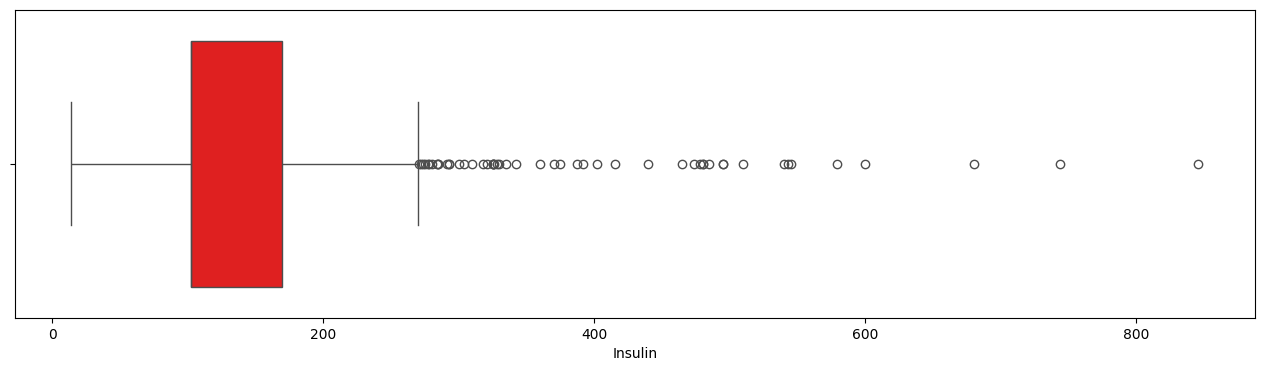

In [71]:
#outlier observation of insulin
import seaborn as sns
plt.figure(figsize=(16,4))
sns.boxplot(x=diabetes["Insulin"],color='red');

In [73]:
#conducting a stand alone observation review for the insulin variable
#suppressing contradictory values
Q1=diabetes.Insulin.quantile(0.25)
Q3=diabetes.Insulin.quantile(0.75)
IQR=Q3-Q1
lower=Q3-1.5*IQR
upper=Q3+1.5*IQR
diabetes.loc[diabetes["Insulin"]>upper,"Insulin"]=upper

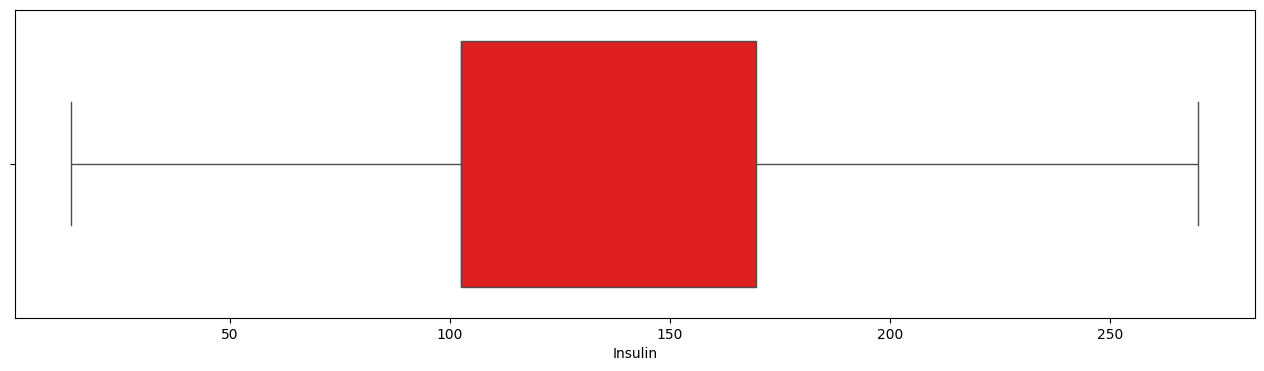

In [74]:
#outlier observation of insulin
import seaborn as sns
plt.figure(figsize=(16,4))
sns.boxplot(x=diabetes["Insulin"],color='red');

LOCAL OUTLIER FACTOR

In [79]:
#determine the outliers between all variables with lof method
from sklearn.neighbors import LocalOutlierFactor
lof=LocalOutlierFactor(n_neighbors=10)
lof.fit_predict(diabetes)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [81]:
diabetes_scores=lof.negative_outlier_factor_ 
np.sort(diabetes_scores)[0:30]

array([-1.99363069, -1.89647992, -1.72829653, -1.71539137, -1.70169563,
       -1.67110632, -1.6433839 , -1.64150637, -1.61348112, -1.60626414,
       -1.59581818, -1.57431104, -1.55763402, -1.5376897 , -1.5276371 ,
       -1.50934735, -1.50406276, -1.48423939, -1.48360412, -1.47452725,
       -1.46612716, -1.45460267, -1.45093468, -1.44757119, -1.44338729,
       -1.43902082, -1.43004934, -1.42994783, -1.42884294, -1.42647051])

In [82]:
threshold=np.sort(diabetes_scores)[7]#ascending ordeer and it pick the 7th place threshold value
threshold

-1.641506373274862

In [83]:
#deleting those who are hoigher than the threshold
outlier=diabetes_scores>threshold#actually true values will be normal and false values are the outlier(remove it)
diabetes=diabetes[outlier]#The dataset is updated to keep only non-outliers (rows where outlier == True).

In [84]:
diabetes.shape

(760, 9)

FEATURE ENGINEERING

Creating new variables is important for models.but we need to create a logical new variables .for this data set,some new variables were created aaccording to BMI,insulin and glucose variables.

In [87]:
# According to BMI, some ranges were determined and categorical variables were assigned.
NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype="category")

diabetes["NewBMI"] = NewBMI[1]  # Default value

diabetes.loc[diabetes["BMI"] < 18.5, "NewBMI"] = NewBMI[0]
diabetes.loc[(diabetes["BMI"] >= 18.5) & (diabetes["BMI"] < 24.9), "NewBMI"] = NewBMI[1]
diabetes.loc[(diabetes["BMI"] >= 24.9) & (diabetes["BMI"] < 29.9), "NewBMI"] = NewBMI[2]
diabetes.loc[(diabetes["BMI"] >= 29.9) & (diabetes["BMI"] < 34.9), "NewBMI"] = NewBMI[3]
diabetes.loc[(diabetes["BMI"] >= 34.9) & (diabetes["BMI"] < 39.9), "NewBMI"] = NewBMI[4]
diabetes.loc[diabetes["BMI"] > 39.9, "NewBMI"] = NewBMI[5]

diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1,Obesity 1
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0,Overweight
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1,Normal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Overweight
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity 3


In [90]:
# A categorical variable creation process is performed according to the insulin value.
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

# The operation performed was added to the dataframe.
diabetes = diabetes.assign(NewInsulinScore=diabetes.apply(set_insulin, axis=1))

# Display the first few rows
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1,Obesity 1,Abnormal
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0,Overweight,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1,Normal,Abnormal
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Overweight,Normal
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity 3,Abnormal


In [92]:
# Same intervals were determined according to the glucose variable, and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype="category")

# Creating a new column 'NewGlucose'
diabetes["NewGlucose"] = NewGlucose

# Assigning categories based on glucose levels
diabetes.loc[diabetes["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
diabetes.loc[(diabetes["Glucose"] > 70) & (diabetes["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
diabetes.loc[(diabetes["Glucose"] > 99) & (diabetes["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
diabetes.loc[diabetes["Glucose"] > 126, "NewGlucose"] = NewGlucose[3]

# Display the first few rows
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI,NewInsulinScore,NewGlucose
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1,Obesity 1,Abnormal,Secret
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0,Overweight,Normal,Normal
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1,Normal,Abnormal,Secret
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0,Overweight,Normal,Normal
4,0.0,137.0,40.0,35.0,168.0,43.1,1.200,33.0,1,Obesity 3,Abnormal,Secret


One Hot Encoding

Categorical variables in the data set should be converted into numerical values. For this reason, these transformation processes are performed with Label Encoding and One Hot Encoding method.


In [99]:
# Here, by making One Hot Encoding transformation, categorical variables were converted into numerical values.
# It is also protected from the Dummy variable trap.
diabetes = pd.get_dummies(diabetes, columns=["NewBMI", "NewInsulinScore", "NewGlucose"], drop_first=True)



diabetes.head()


KeyError: "None of [Index(['NewBMI', 'NewInsulinScore', 'NewGlucose'], dtype='object')] are in the [columns]"

In [98]:
diabetes = pd.get_dummies(diabetes, columns=["NewBMI_Obesity 1", "NewBMI_Obesity 2", "NewBMI_Obesity 3"], drop_first=True)
diabetes = diabetes.astype(int)


In [100]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret,NewBMI_Obesity 1_True,NewBMI_Obesity 2_True,NewBMI_Obesity 3_True
0,6,148,72,35,169,33,0,50,1,0,0,0,0,0,0,1,1,0,0
1,1,85,66,29,102,26,0,31,0,1,0,1,0,1,0,0,0,0,0
2,8,183,64,32,169,23,0,32,1,0,0,0,0,0,0,1,0,0,0
3,1,89,66,23,94,28,0,21,0,1,0,1,0,1,0,0,0,0,0
4,0,137,40,35,168,43,1,33,1,0,0,0,0,0,0,1,0,0,1


In [97]:
print(diabetes.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'NewBMI_Obesity 1',
       'NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight',
       'NewBMI_Underweight', 'NewInsulinScore_Normal', 'NewGlucose_Low',
       'NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'],
      dtype='object')


In [103]:
# Selecting categorical columns after one-hot encoding
categorical_diabetes = diabetes[['NewBMI_Obesity 1_True', 'NewBMI_Obesity 2_True', 'NewBMI_Obesity 3_True', 
                     'NewBMI_Overweight', 'NewBMI_Underweight', 'NewInsulinScore_Normal', 
                     'NewGlucose_Low', 'NewGlucose_Normal', 'NewGlucose_Overweight', 
                     'NewGlucose_Secret']]

# Display first few rows of categorical DataFrame
categorical_diabetes.head()

,NewBMI_Obesity 1_True,NewBMI_Obesity 2_True,NewBMI_Obesity 3_True,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,1,0,0,0,0,0,0,0,0,1
1,0,0,0,1,0,1,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,1,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1


In [102]:
print(diabetes.columns)


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome',
       'NewBMI_Overweight', 'NewBMI_Underweight', 'NewInsulinScore_Normal',
       'NewGlucose_Low', 'NewGlucose_Normal', 'NewGlucose_Overweight',
       'NewGlucose_Secret', 'NewBMI_Obesity 1_True', 'NewBMI_Obesity 2_True',
       'NewBMI_Obesity 3_True'],
      dtype='object')


In [105]:
# Splitting data into features (X) and target variable (y)
y = diabetes["Outcome"]
X = diabetes.drop(["Outcome", "NewBMI_Obesity 1_True", "NewBMI_Obesity 2_True", "NewBMI_Obesity 3_True", 
             "NewBMI_Overweight", "NewBMI_Underweight", "NewInsulinScore_Normal", 
             "NewGlucose_Low", "NewGlucose_Normal", "NewGlucose_Overweight", 
             "NewGlucose_Secret"], axis=1)

# Storing column names and index
cols = X.columns
index = X.index

# Display first few rows of features DataFrame
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,169,33,0,50
1,1,85,66,29,102,26,0,31
2,8,183,64,32,169,23,0,32
3,1,89,66,23,94,28,0,21
4,0,137,40,35,168,43,1,33


In [106]:
# The variables in the data set are an effective factor in increasing the performance of the models by standardization.
# There are multiple standardization methods. These are methods such as "Normalize", "MinMax", "Robust" and "Scale".

from sklearn.preprocessing import RobustScaler

# Initializing and fitting the RobustScaler
transformer = RobustScaler().fit(X)

# Transforming the feature set
X = transformer.transform(X)

# Converting back to DataFrame with original column names and index
X = pd.DataFrame(X, columns=cols, index=index)

# Displaying the first few rows
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.756098,0.000,1.000000,0.977612,0.111111,0.0,1.235294
1,-0.4,-0.780488,-0.375,0.142857,-0.022388,-0.666667,0.0,0.117647
2,1.0,1.609756,-0.500,0.571429,0.977612,-1.000000,0.0,0.176471
3,-0.4,-0.682927,-0.375,-0.714286,-0.141791,-0.444444,0.0,-0.470588
4,-0.6,0.487805,-2.000,1.000000,0.962687,1.222222,1.0,0.235294


In [107]:
# Concatenating numerical features (X) with one-hot encoded categorical features (categorical_df)
X = pd.concat([X, categorical_diabetes], axis=1)

# Display first few rows of the updated DataFrame
X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1_True,NewBMI_Obesity 2_True,NewBMI_Obesity 3_True,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.6,0.756098,0.000,1.000000,0.977612,0.111111,0.0,1.235294,1,0,0,0,0,0,0,0,0,1
1,-0.4,-0.780488,-0.375,0.142857,-0.022388,-0.666667,0.0,0.117647,0,0,0,1,0,1,0,1,0,0
2,1.0,1.609756,-0.500,0.571429,0.977612,-1.000000,0.0,0.176471,0,0,0,0,0,0,0,0,0,1
3,-0.4,-0.682927,-0.375,-0.714286,-0.141791,-0.444444,0.0,-0.470588,0,0,0,1,0,1,0,1,0,0
4,-0.6,0.487805,-2.000,1.000000,0.962687,1.222222,1.0,0.235294,0,0,1,0,0,0,0,0,0,1


In [108]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int32

In [109]:
# Import necessary libraries
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt

# Validation scores of all base models
models = []
models.append(('LR', LogisticRegression(random_state=12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('RF', RandomForestClassifier(random_state=12345)))
models.append(('SVM', SVC(gamma='auto', random_state=12345)))
models.append(('XGB', GradientBoostingClassifier(random_state=12345)))
models.append(('LightGBM', LGBMClassifier(random_state=12345)))

# Evaluate each model in turn
results = []
names = []

LR: 0.843421 (0.039232)
KNN: 0.832895 (0.018655)
RF: 0.885526 (0.039055)
SVM: 0.853947 (0.041796)
XGB: 0.884211 (0.035208)
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 239, number of negative: 445
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 348
[LightGBM] [Info] Number of data points in the train set: 684, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.349415 -> initscore=-0.621611
[LightGBM] [Info] Start training from score -0.621611
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] 

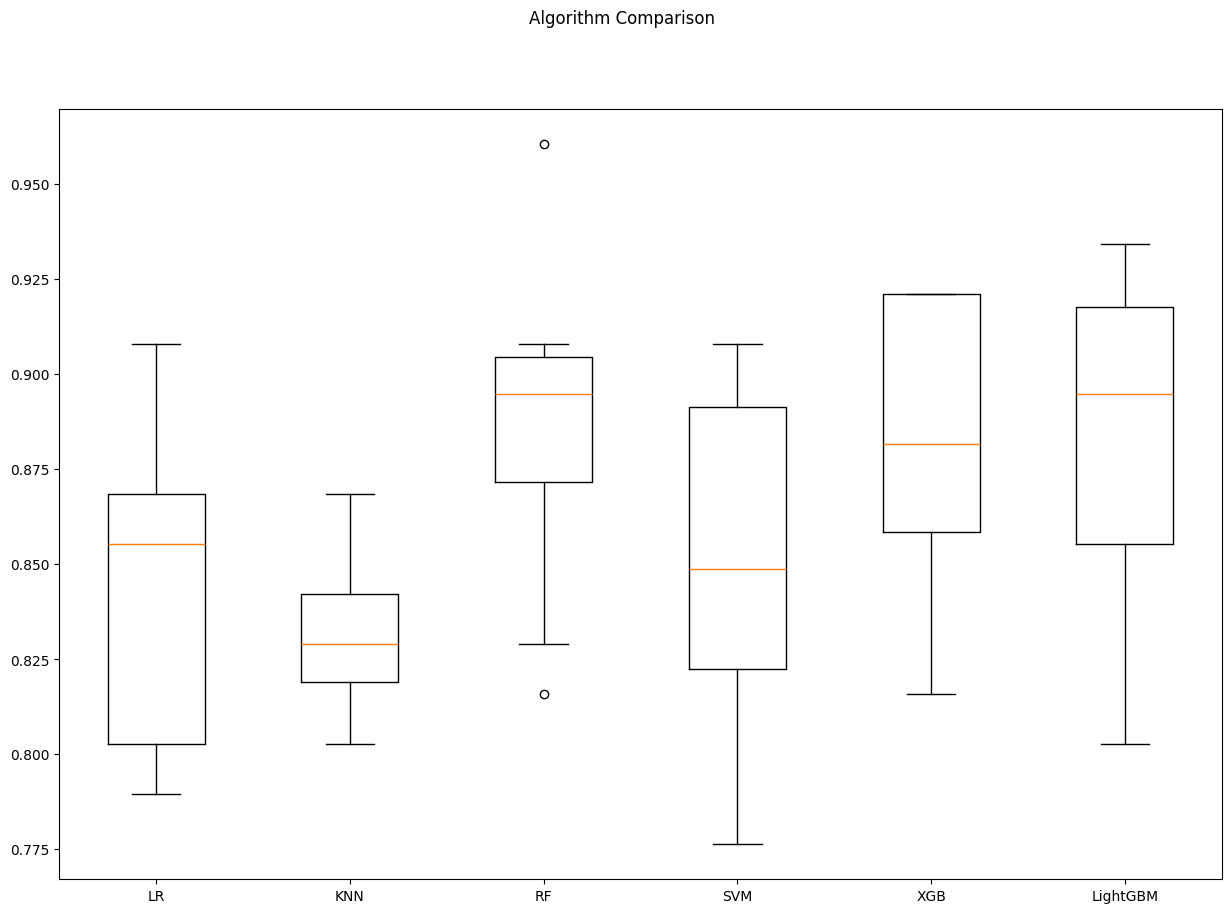

In [110]:
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot algorithm comparison
fig = plt.figure(figsize=(15,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


--- Cross-Validation Results ---

Logistic Regression: 0.8241 (0.0517)
KNN: 0.8569 (0.0497)
Random Forest: 0.8604 (0.0590)
SVM: 0.6431 (0.0059)
Gradient Boosting: 0.8569 (0.0583)
Decision Tree: 0.8536 (0.0551)
XGBoost: 0.8652 (0.0496)
AdaBoost: 0.8519 (0.0560)
Naïve Bayes: 0.6349 (0.0606)

--- Model Performance on Test Data ---

Logistic Regression Accuracy on Test Data: 0.8750
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       103
           1       0.77      0.88      0.82        49

    accuracy                           0.88       152
   macro avg       0.85      0.88      0.86       152
weighted avg       0.88      0.88      0.88       152

KNN Accuracy on Test Data: 0.8816
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       103
           1       0.84      0.78      0.81        49

    accuracy                           0.88       152
   macro avg       0.87      0.85      

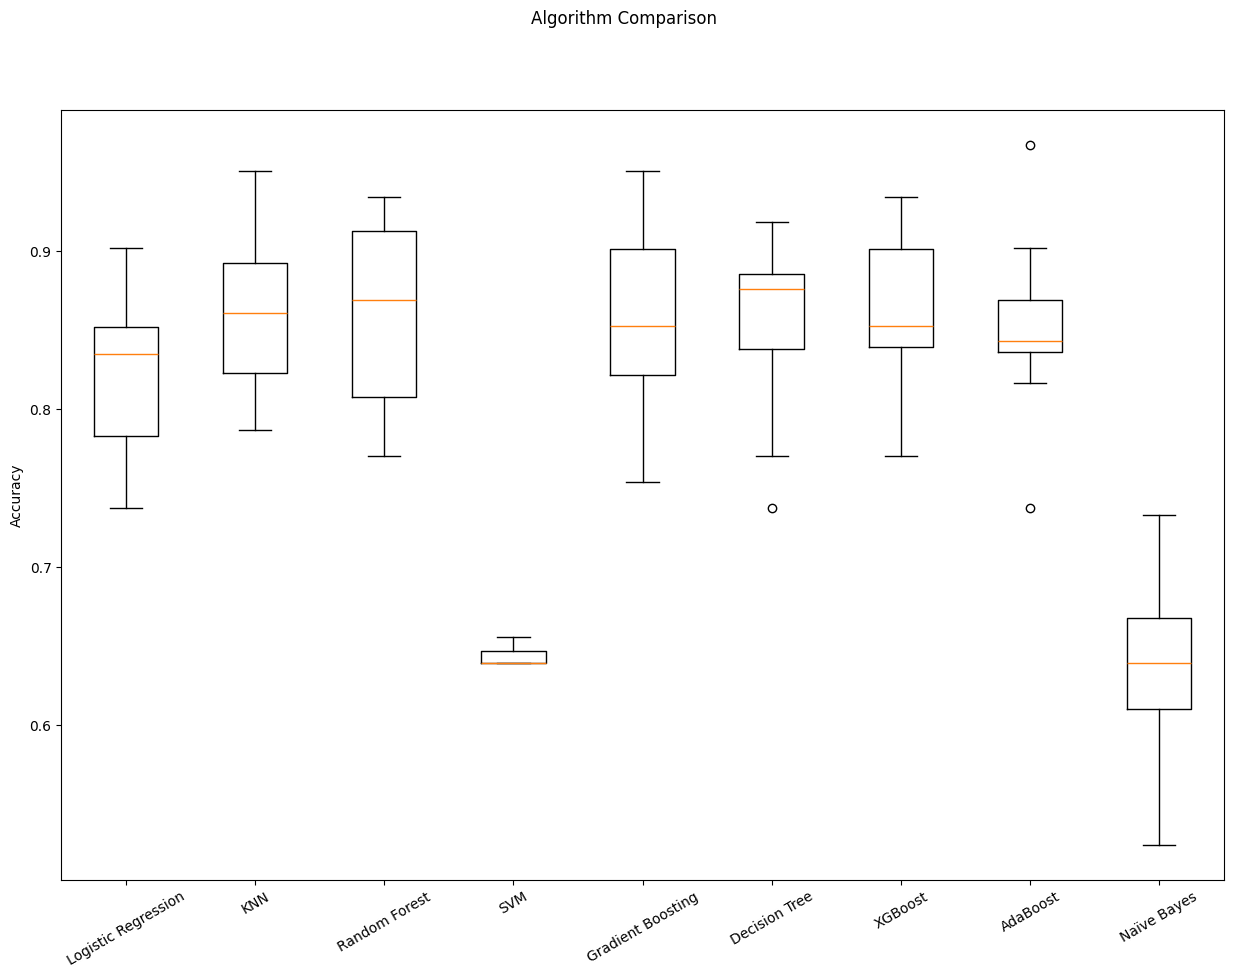

In [113]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset (Replace with your dataset)


# Splitting data into features (X) and target variable (y)
y = diabetes["Outcome"]  # Replace with your target column name
X = diabetes.drop(["Outcome"], axis=1)  # Drop target column from features

# Splitting dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models
models = []
models.append(('Logistic Regression', LogisticRegression(random_state=12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Random Forest', RandomForestClassifier(random_state=12345)))
models.append(('SVM', SVC(gamma='auto', random_state=12345)))
models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=12345)))
#models.append(('LightGBM', LGBMClassifier(random_state=12345)))
models.append(('Decision Tree', DecisionTreeClassifier(random_state=12345)))
models.append(('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=12345)))
models.append(('AdaBoost', AdaBoostClassifier(random_state=12345)))
models.append(('Naïve Bayes', GaussianNB()))

# Evaluating each model using 10-fold cross-validation
results = []
names = []
final_scores = {}

print("\n--- Cross-Validation Results ---\n")
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    final_scores[name] = cv_results.mean()
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

# Training models on full training data and evaluating on test data
print("\n--- Model Performance on Test Data ---\n")
for name, model in models:
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"{name} Accuracy on Test Data: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print("=" * 50)

# Boxplot to compare model performances
fig = plt.figure(figsize=(15, 10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=30)
plt.ylabel("Accuracy")
plt.show()



--- Cross-Validation Results ---

Logistic Regression: 0.8241 (0.0517)
KNN: 0.8569 (0.0497)
Random Forest: 0.8604 (0.0590)
SVM: 0.6431 (0.0059)
Gradient Boosting: 0.8569 (0.0583)
Decision Tree: 0.8536 (0.0551)
XGBoost: 0.8652 (0.0496)
AdaBoost: 0.8519 (0.0560)
Naïve Bayes: 0.6349 (0.0606)

✅ Best Model (Cross-Validation Accuracy): XGBoost with 0.8652

--- Model Performance on Test Data ---

Logistic Regression Accuracy on Test Data: 0.8750
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       103
           1       0.77      0.88      0.82        49

    accuracy                           0.88       152
   macro avg       0.85      0.88      0.86       152
weighted avg       0.88      0.88      0.88       152

KNN Accuracy on Test Data: 0.8816
              precision    recall  f1-score   support

           0       0.90      0.93      0.91       103
           1       0.84      0.78      0.81        49

    accuracy                  

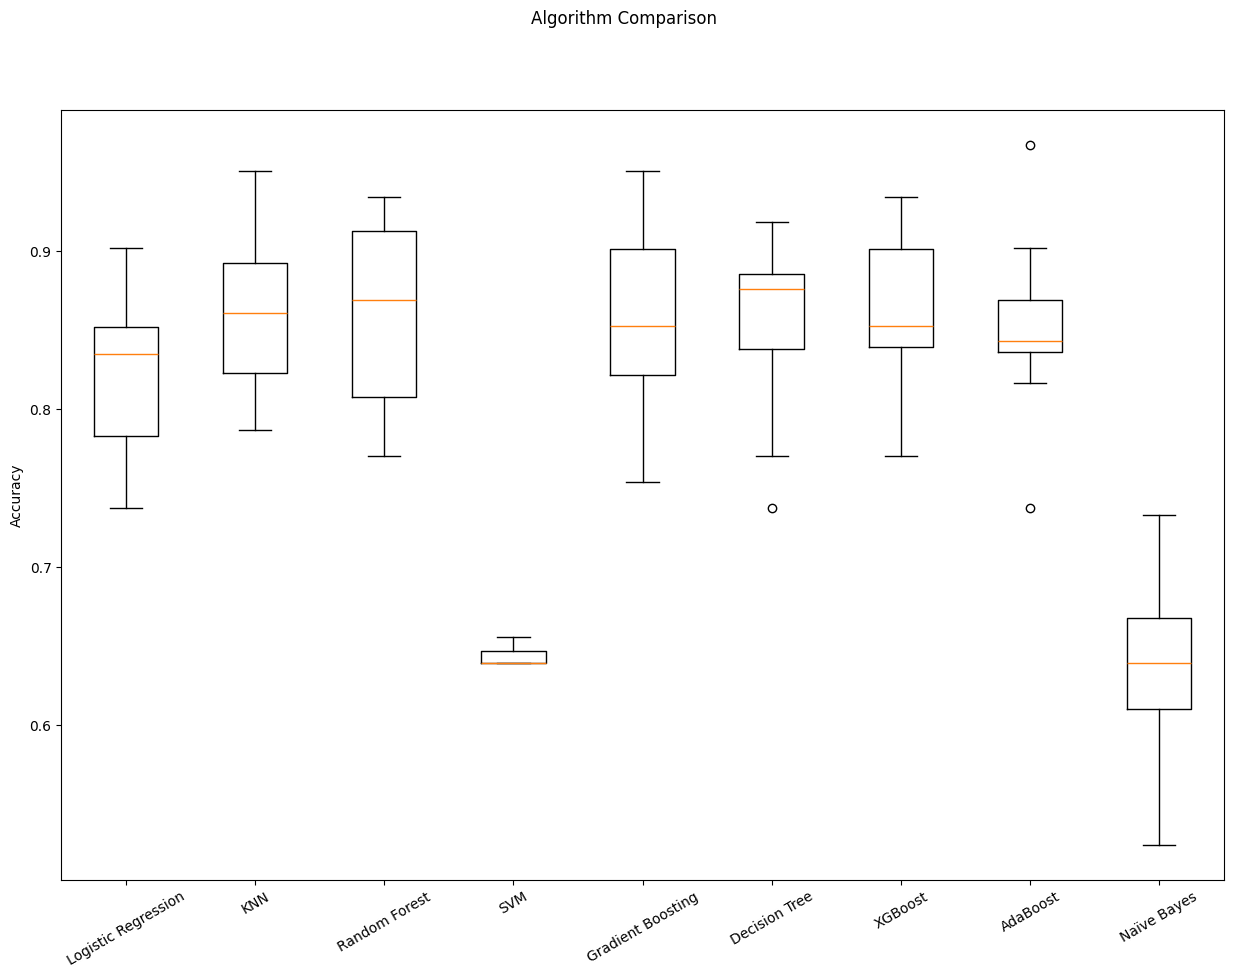

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report



# Splitting data into features (X) and target variable (y)
y = diabetes["Outcome"]  # Replace with your target column name
X = diabetes.drop(["Outcome"], axis=1)  # Drop target column from features

# Splitting dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of models
models = []
models.append(('Logistic Regression', LogisticRegression(random_state=12345)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Random Forest', RandomForestClassifier(random_state=12345)))
models.append(('SVM', SVC(gamma='auto', random_state=12345)))
models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=12345)))
#models.append(('LightGBM', LGBMClassifier(random_state=12345)))
models.append(('Decision Tree', DecisionTreeClassifier(random_state=12345)))
models.append(('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=12345)))
models.append(('AdaBoost', AdaBoostClassifier(random_state=12345)))
models.append(('Naïve Bayes', GaussianNB()))

# Evaluating each model using 10-fold cross-validation
results = []
names = []
final_scores = {}

print("\n--- Cross-Validation Results ---\n")
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=10, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    final_scores[name] = cv_results.mean()
    print(f"{name}: {cv_results.mean():.4f} ({cv_results.std():.4f})")

# Find the best model based on cross-validation accuracy
best_model_name = max(final_scores, key=final_scores.get)
best_model_score = final_scores[best_model_name]

print(f"\n✅ Best Model (Cross-Validation Accuracy): {best_model_name} with {best_model_score:.4f}")

# Training models on full training data and evaluating on test data
print("\n--- Model Performance on Test Data ---\n")
best_test_model = None
best_test_accuracy = 0
for name, model in models:
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data
    acc = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f"{name} Accuracy on Test Data: {acc:.4f}")
    
    if acc > best_test_accuracy:  # Store best model based on test accuracy
        best_test_accuracy = acc
        best_test_model = name

    print(classification_report(y_test, y_pred))
    print("=" * 50)

# Display the best model based on test data accuracy
print(f"\n🏆 Best Model (Test Data Accuracy): {best_test_model} with {best_test_accuracy:.4f}")

# Boxplot to compare model performances
fig = plt.figure(figsize=(15, 10))
fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=30)
plt.ylabel("Accuracy")
plt.show()


In [116]:
import pickle

# Assuming XGBoost is stored in models[4] (Verify the index in your list)
best_model = models[4]  # Change the index if needed

# Save the model as a pickle file
with open("diabetes.pkl", "wb") as file:
    pickle.dump(best_model, file)

print("✅ XGBoost model saved successfully as 'diabetes.pkl'")


✅ XGBoost model saved successfully as 'diabetes.pkl'
